#Problem staement:
- A reduction in staff due to attrition is often called a hiring freeze and is seen as a less disruptive way to trim the workforce and reduce payroll than layoffs
- In this NoteBook our Aim will be to analyze the datasets completely wrt each and feature and find the reason behind Attrition of Employees.
- And what the top factors which lead to employee attrition?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Get the Data</h2>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data=pd.read_csv('/content/drive/My Drive/Employee-Attrition.csv')

In [ ]:
# If i want to see all columns we use the below pandas score.

pd.set_option('display.max_columns',None)

<h2>Basic Data Exploration</h2>

- This is an Important Step in Machine Learning to ensure about the columns, and rows present.
- First, we will check the shape of the dataset
- Second, we will check the head, tail, and sample of the datasets
- Third, we will check the Data Description
- Then, we will check the Data Types of the columns present in the data.

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations**
* we only have int and string data types features. there is no feature with float. 26 features are numerical and 9 features are categorical
* Attrition in out target value which has no missing value. But, the quantity of data of emp having Attrition is less compared to employees which do not have Attrition.

## Check Duplicates

In [ ]:
print(data.duplicated().value_counts())

False    1470
Name: count, dtype: int64


## Checking missing value

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# If there is any null values then:
# list_miss_value=[columns which have null values]
# for i in list_miss_value:
#     dataset[col]=dataset[col].fillna(dataset[col].median())

In [ ]:
#then replace the null values
# for example:
# data['Department']=data['Department'].fillna('Analytics')
# data['Designation']=data['Designation'].fillna('Executive')
# data['Gender']=data['Gender'].fillna('male)

## Target Variable

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Attrition',data=data)
plt.show()

NameError: name 'plt' is not defined

Over here we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.

# Exploratory Data Analysis

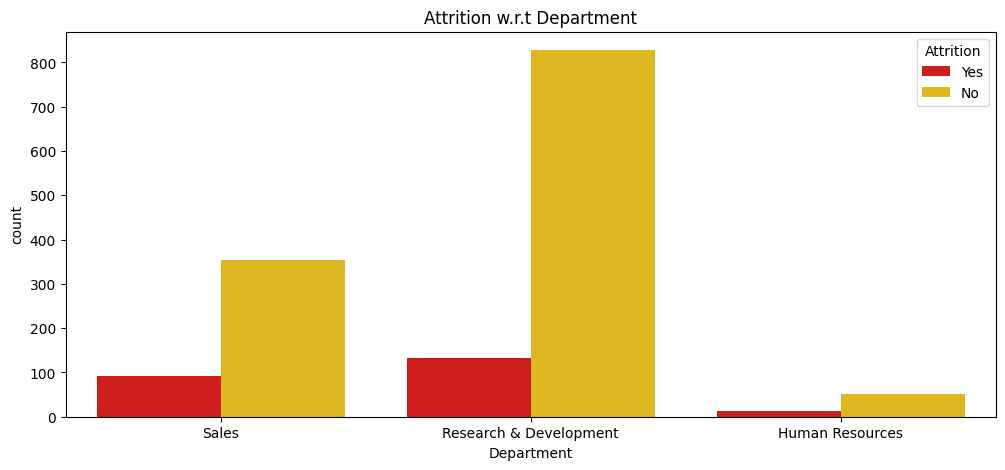

In [ ]:
#Department wise Attrition

plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=data,palette='hot')
plt.title('Attrition w.r.t Department')
plt.show()

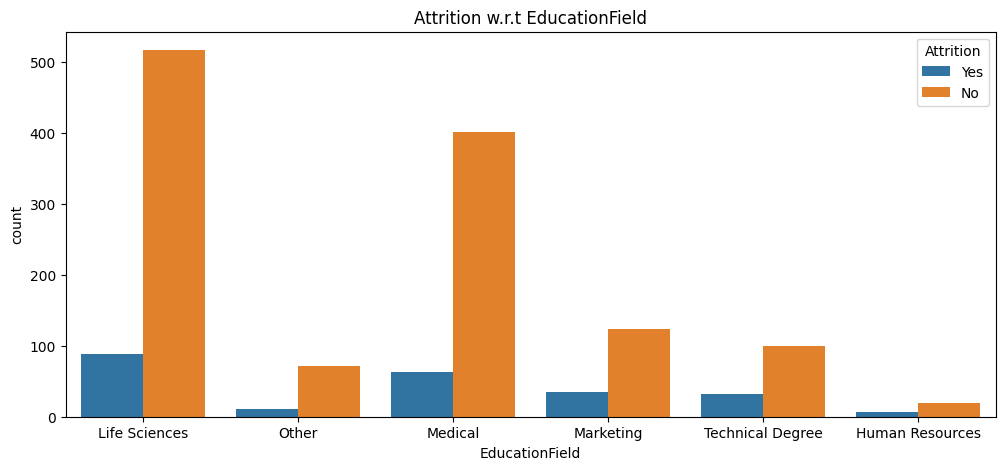

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=data)
plt.title('Attrition w.r.t EducationField')
plt.show()

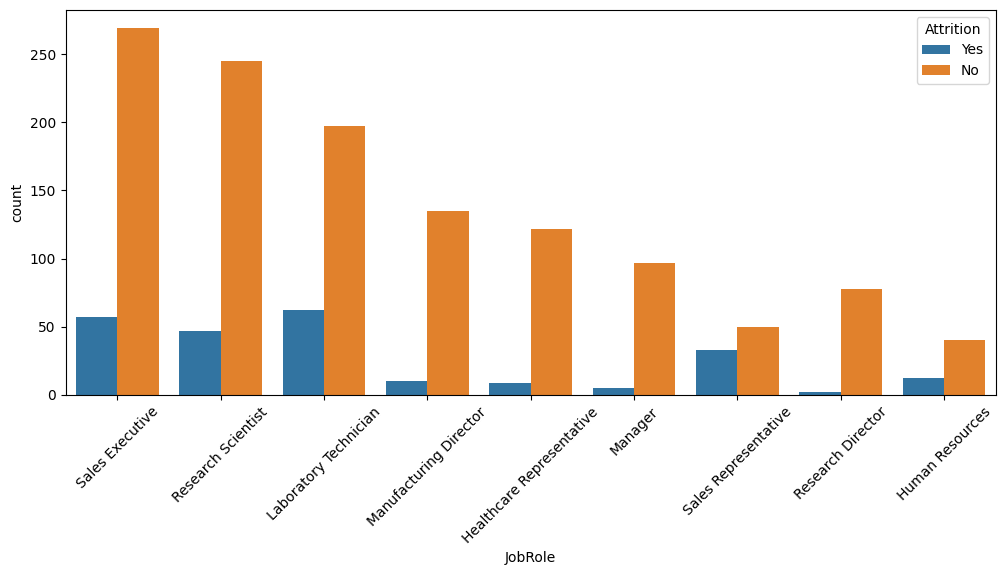

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition',data=data)
#plt.legend(loc=1)
plt.xticks(rotation=45)
plt.show()

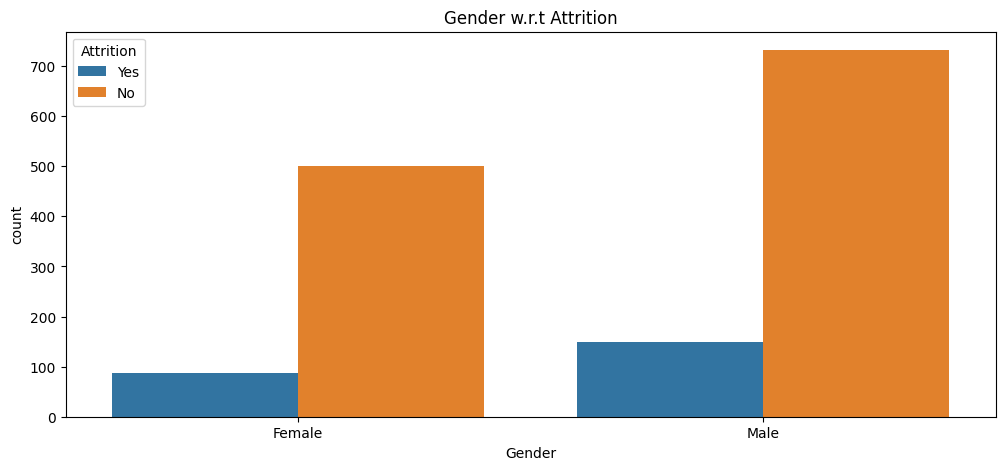

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=data)
plt.title('Gender w.r.t Attrition')
plt.show()

**OBSERVATIONS**
- Employees working in R&D department are more, but employees from sales department or at position like sales executive,sale Representative leaves the job early.
- Males are more under Attrition then Females

In [ ]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [ ]:
data['count']=1

In [1]:
data.groupby(['Gender','Attrition']).agg({'count':'sum'})

NameError: name 'data' is not defined

In [ ]:
87/(501+87)

0.14795918367346939

In [ ]:
150/(732+150)

0.17006802721088435

<Axes: xlabel='Age', ylabel='Density'>

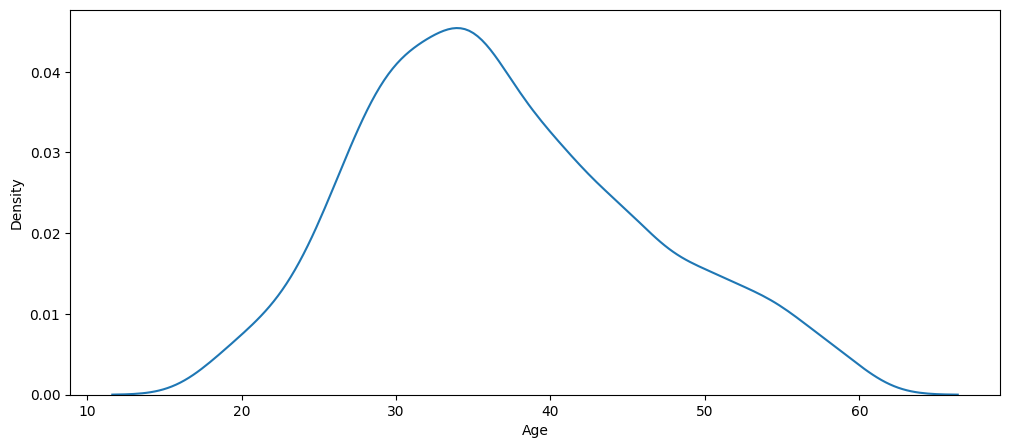

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)

* Age column is very well normalized, most of employees are age between 25 to 40.


In [ ]:
ordinal_features=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                  'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


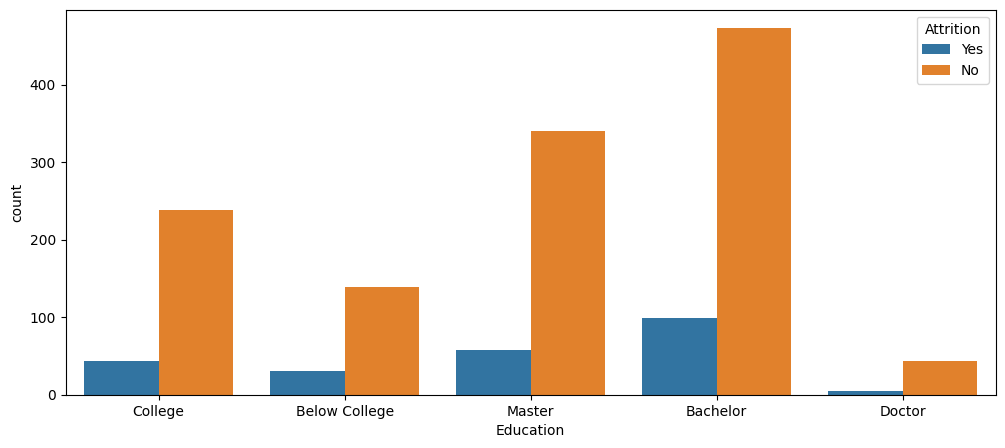

In [ ]:
edu_map={1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition',data=data)
plt.show()

**OBSERVATIONS**
- Employees from Bachelor are more, then from Masters background.

## Label Encodeing

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words.

In [ ]:
data['Attrition']=data['Attrition'].replace({'No':0, 'Yes':1})

In [ ]:
data['OverTime']=data['OverTime'].map({'No':0, 'Yes':1})
data['Gender']=data['Gender'].map({'Male':0, 'Female':1})


In [ ]:
data['Over18']=data['Over18'].map({'Y':1, 'N':0})

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders={}
for column in encoding_cols:
  label_encoders[column]=LabelEncoder()
  data[column]= label_encoders[column].fit_transform(data[column])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,count
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1


## Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built.

In [ ]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition'].values

In [ ]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,count
0,41,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1
4,27,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1


In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

# Resampling

- We are going to use Over Sampling.
- We will not use Under Sampling to avoid data loss.

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus= RandomOverSampler(random_state=42)
x_over, y_over= rus.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(x_over, y_over, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 35)
(1972,)
(494, 35)
(494,)


# Logistic Regression in Machine Learning

Logistic Regression is used for predicting a category, specially the Binary categories(Yes/No , 0/1).


When there are only two outcomes in Target Variable it is known as Binomial Logistic Regression.

If there are more than two outcomes in Target Variable it is known as Multinomial Logistic Regression.

Logistic regression is based on logit function logit(x) = log(x / (1 – x))

The output is a value between 0 to 1. It is the probability of an event’s occurrence.

E.g. There is an 80% chance that the loan application is good, approve it.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
prediction=logreg.predict(X_test)
cnf_matrix= confusion_matrix(y_test,prediction)
print('Accuracy Score', accuracy_score(y_test,prediction))

Accuracy Score 0.6396761133603239


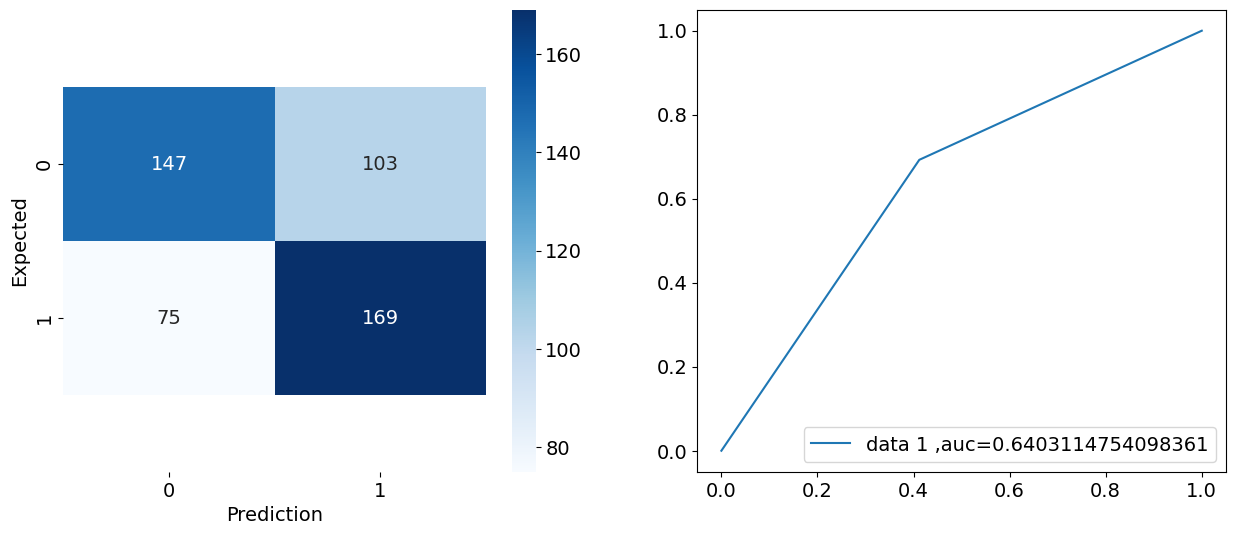

In [ ]:
fig=plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues',fmt='d')
bottom,top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Expected')


ax2=fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_ = roc_curve(y_test, prediction)
auc=roc_auc_score(y_test,prediction)
ax2=plt.plot(fpr,tpr,label='data 1 ,auc='+ str(auc))
plt.legend(loc=4)
plt.show()